## Use Pyramid Auro Arima for time series forecasting

In [2]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#load the data
data = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\hourlydata.csv')

In [4]:
# Set index as time
data.set_index("time", inplace = True)

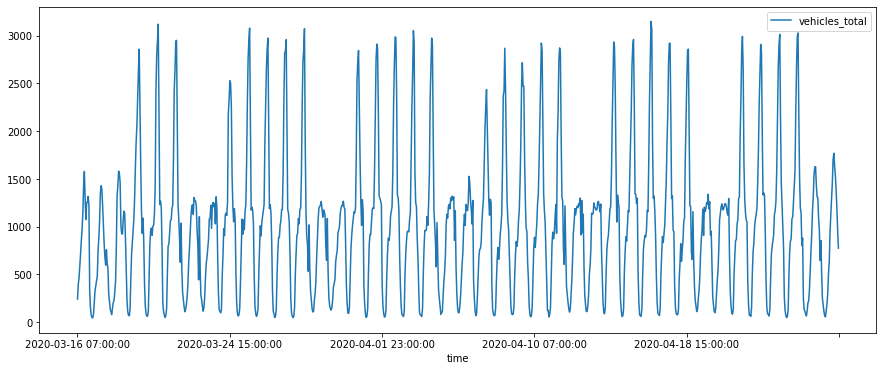

In [5]:
# Plot the dataframe to visualize time series data
data.plot(figsize=(15, 6))
plt.show()

In [6]:
# Convert the Index to DatetimeIndex
data.index = pd.to_datetime(data.index)

In [7]:
# Resample the hourly data into daily data
data_daily = data.resample('D').sum()

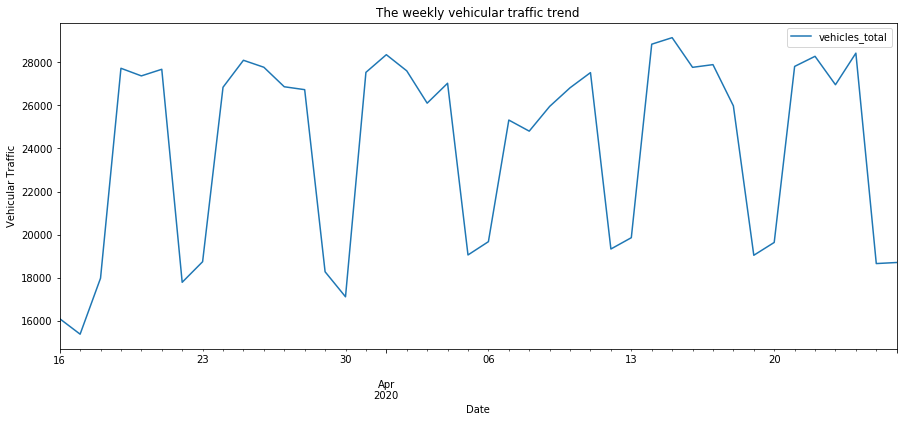

In [8]:
# Plot the dataframe to visualize time series data
data_daily.plot(figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Vehicular Traffic')
plt.title('The weekly vehicular traffic trend')
plt.show()

# Use statsmodel to analyze daily vehicular traffic

In [9]:
# Import statmdoels for timeseries
import statsmodels.api as sm

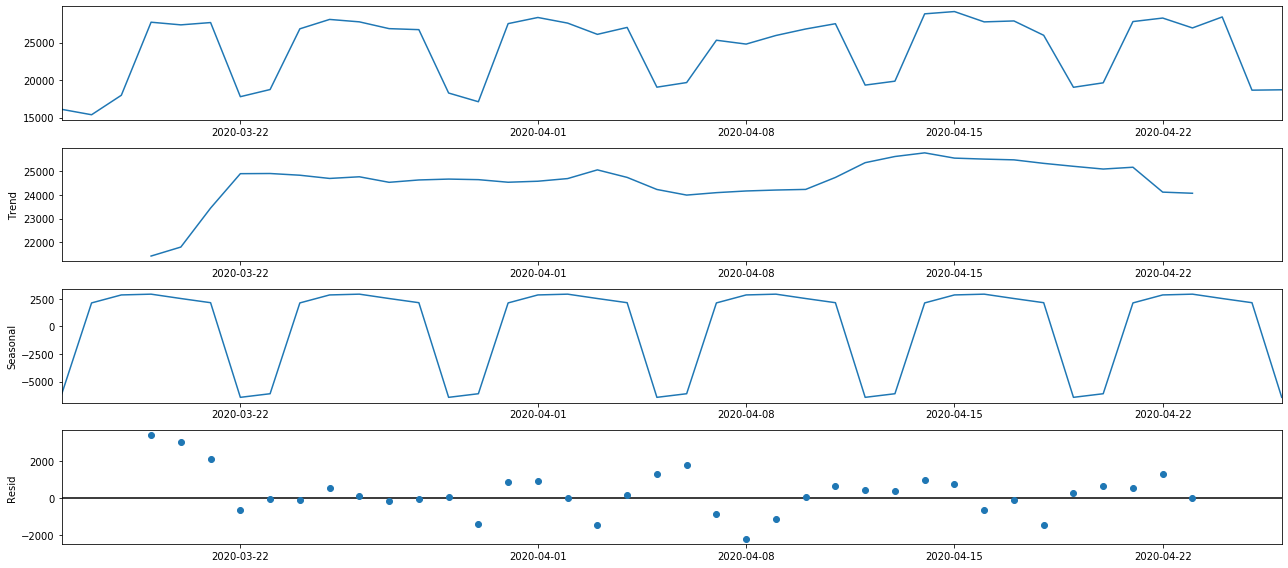

In [10]:
# Use decomposition method to visualize the various components of time series data
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data_daily, model='additive', freq = 7)
fig = decomposition.plot()
plt.show()

In [10]:
import itertools

p = d = q = range(0, 3)
#p = d = q = (0, 1, 2, 3)
pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# Our frequency is weekly so with data resampled as daily the value of m would be 7 
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...

SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [11]:
# Perform Grid Search to find optimal parameters for ARIMA

# Create and initialize empty dictionary (to store min param values) with 'param', 'param_seasonal' and 'aic' keys
param_dict = {'param': None, 'param_seasonal': None, 'aic': None}
min_aic = 1000000

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_daily, order=param, seasonal_order=param_seasonal,
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < min_aic:
                param_dict.update([('param', param), ('param_seasonal', param_seasonal), ('aic', np.round(results.aic,2))])
                min_aic = results.aic
            
            print('ARIMA {} x {} X 7 - AIC:{}'.format(param, param_seasonal, np.round(results.aic,2)))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 7) X 7 - AIC:947.68
ARIMA (0, 0, 0) x (0, 0, 1, 7) X 7 - AIC:750.27
ARIMA (0, 0, 0) x (0, 0, 2, 7) X 7 - AIC:581.32
ARIMA (0, 0, 0) x (0, 1, 0, 7) X 7 - AIC:648.59
ARIMA (0, 0, 0) x (0, 1, 1, 7) X 7 - AIC:495.83
ARIMA (0, 0, 0) x (0, 1, 2, 7) X 7 - AIC:374.28
ARIMA (0, 0, 0) x (0, 2, 0, 7) X 7 - AIC:528.53
ARIMA (0, 0, 0) x (0, 2, 1, 7) X 7 - AIC:657.38
ARIMA (0, 0, 0) x (0, 2, 2, 7) X 7 - AIC:247.84
ARIMA (0, 0, 0) x (1, 0, 0, 7) X 7 - AIC:669.06
ARIMA (0, 0, 0) x (1, 0, 1, 7) X 7 - AIC:661.05
ARIMA (0, 0, 0) x (1, 0, 2, 7) X 7 - AIC:516.23
ARIMA (0, 0, 0) x (1, 1, 0, 7) X 7 - AIC:512.18
ARIMA (0, 0, 0) x (1, 1, 1, 7) X 7 - AIC:495.68
ARIMA (0, 0, 0) x (1, 1, 2, 7) X 7 - AIC:376.23
ARIMA (0, 0, 0) x (1, 2, 0, 7) X 7 - AIC:404.6
ARIMA (0, 0, 0) x (1, 2, 1, 7) X 7 - AIC:665.44
ARIMA (0, 0, 0) x (1, 2, 2, 7) X 7 - AIC:254.34
ARIMA (0, 0, 0) x (2, 0, 0, 7) X 7 - AIC:514.0
ARIMA (0, 0, 0) x (2, 0, 1, 7) X 7 - AIC:515.93
ARIMA (0, 0, 0) x (2, 0, 2, 7) X 7 - AIC:5

ARIMA (0, 2, 0) x (1, 0, 2, 7) X 7 - AIC:493.31
ARIMA (0, 2, 0) x (1, 1, 0, 7) X 7 - AIC:510.76
ARIMA (0, 2, 0) x (1, 1, 1, 7) X 7 - AIC:493.75
ARIMA (0, 2, 0) x (1, 1, 2, 7) X 7 - AIC:358.72
ARIMA (0, 2, 0) x (1, 2, 0, 7) X 7 - AIC:380.15
ARIMA (0, 2, 0) x (1, 2, 1, 7) X 7 - AIC:791.22
ARIMA (0, 2, 0) x (1, 2, 2, 7) X 7 - AIC:221.25
ARIMA (0, 2, 0) x (2, 0, 0, 7) X 7 - AIC:510.71
ARIMA (0, 2, 0) x (2, 0, 1, 7) X 7 - AIC:509.46
ARIMA (0, 2, 0) x (2, 0, 2, 7) X 7 - AIC:489.69
ARIMA (0, 2, 0) x (2, 1, 0, 7) X 7 - AIC:379.61
ARIMA (0, 2, 0) x (2, 1, 1, 7) X 7 - AIC:381.56
ARIMA (0, 2, 0) x (2, 1, 2, 7) X 7 - AIC:361.79
ARIMA (0, 2, 0) x (2, 2, 0, 7) X 7 - AIC:242.86
ARIMA (0, 2, 0) x (2, 2, 1, 7) X 7 - AIC:241.54
ARIMA (0, 2, 0) x (2, 2, 2, 7) X 7 - AIC:223.79
ARIMA (0, 2, 1) x (0, 0, 0, 7) X 7 - AIC:766.96
ARIMA (0, 2, 1) x (0, 0, 1, 7) X 7 - AIC:611.25
ARIMA (0, 2, 1) x (0, 0, 2, 7) X 7 - AIC:476.55
ARIMA (0, 2, 1) x (0, 1, 0, 7) X 7 - AIC:586.06
ARIMA (0, 2, 1) x (0, 1, 1, 7) X 7 - AIC

ARIMA (1, 1, 0) x (2, 1, 1, 7) X 7 - AIC:357.99
ARIMA (1, 1, 0) x (2, 1, 2, 7) X 7 - AIC:359.79
ARIMA (1, 1, 0) x (2, 2, 0, 7) X 7 - AIC:232.91
ARIMA (1, 1, 0) x (2, 2, 1, 7) X 7 - AIC:231.83
ARIMA (1, 1, 0) x (2, 2, 2, 7) X 7 - AIC:233.17
ARIMA (1, 1, 1) x (0, 0, 0, 7) X 7 - AIC:765.98
ARIMA (1, 1, 1) x (0, 0, 1, 7) X 7 - AIC:617.72
ARIMA (1, 1, 1) x (0, 0, 2, 7) X 7 - AIC:472.82
ARIMA (1, 1, 1) x (0, 1, 0, 7) X 7 - AIC:607.12
ARIMA (1, 1, 1) x (0, 1, 1, 7) X 7 - AIC:466.18
ARIMA (1, 1, 1) x (0, 1, 2, 7) X 7 - AIC:339.18
ARIMA (1, 1, 1) x (0, 2, 0, 7) X 7 - AIC:480.91
ARIMA (1, 1, 1) x (0, 2, 1, 7) X 7 - AIC:811.8
ARIMA (1, 1, 1) x (0, 2, 2, 7) X 7 - AIC:209.05
ARIMA (1, 1, 1) x (1, 0, 0, 7) X 7 - AIC:617.8
ARIMA (1, 1, 1) x (1, 0, 1, 7) X 7 - AIC:603.89
ARIMA (1, 1, 1) x (1, 0, 2, 7) X 7 - AIC:465.43
ARIMA (1, 1, 1) x (1, 1, 0, 7) X 7 - AIC:482.92
ARIMA (1, 1, 1) x (1, 1, 1, 7) X 7 - AIC:463.36
ARIMA (1, 1, 1) x (1, 1, 2, 7) X 7 - AIC:340.37
ARIMA (1, 1, 1) x (1, 2, 0, 7) X 7 - AIC:3

ARIMA (2, 0, 1) x (0, 1, 2, 7) X 7 - AIC:357.77
ARIMA (2, 0, 1) x (0, 2, 0, 7) X 7 - AIC:497.59
ARIMA (2, 0, 1) x (0, 2, 1, 7) X 7 - AIC:669.37
ARIMA (2, 0, 1) x (0, 2, 2, 7) X 7 - AIC:229.54
ARIMA (2, 0, 1) x (1, 0, 0, 7) X 7 - AIC:627.22
ARIMA (2, 0, 1) x (1, 0, 1, 7) X 7 - AIC:632.22
ARIMA (2, 0, 1) x (1, 0, 2, 7) X 7 - AIC:502.1
ARIMA (2, 0, 1) x (1, 1, 0, 7) X 7 - AIC:480.76
ARIMA (2, 0, 1) x (1, 1, 1, 7) X 7 - AIC:479.18
ARIMA (2, 0, 1) x (1, 1, 2, 7) X 7 - AIC:360.13
ARIMA (2, 0, 1) x (1, 2, 0, 7) X 7 - AIC:360.51
ARIMA (2, 0, 1) x (1, 2, 1, 7) X 7 - AIC:629.66
ARIMA (2, 0, 1) x (1, 2, 2, 7) X 7 - AIC:231.21
ARIMA (2, 0, 1) x (2, 0, 0, 7) X 7 - AIC:500.02
ARIMA (2, 0, 1) x (2, 0, 1, 7) X 7 - AIC:501.98
ARIMA (2, 0, 1) x (2, 0, 2, 7) X 7 - AIC:556.43
ARIMA (2, 0, 1) x (2, 1, 0, 7) X 7 - AIC:356.96
ARIMA (2, 0, 1) x (2, 1, 1, 7) X 7 - AIC:358.55
ARIMA (2, 0, 1) x (2, 1, 2, 7) X 7 - AIC:355.35
ARIMA (2, 0, 1) x (2, 2, 0, 7) X 7 - AIC:231.81
ARIMA (2, 0, 1) x (2, 2, 1, 7) X 7 - AIC:

ARIMA (2, 2, 1) x (1, 1, 2, 7) X 7 - AIC:328.23
ARIMA (2, 2, 1) x (1, 2, 0, 7) X 7 - AIC:332.59
ARIMA (2, 2, 1) x (1, 2, 1, 7) X 7 - AIC:1474.07
ARIMA (2, 2, 1) x (1, 2, 2, 7) X 7 - AIC:196.57
ARIMA (2, 2, 1) x (2, 0, 0, 7) X 7 - AIC:453.59
ARIMA (2, 2, 1) x (2, 0, 1, 7) X 7 - AIC:454.9
ARIMA (2, 2, 1) x (2, 0, 2, 7) X 7 - AIC:466.21
ARIMA (2, 2, 1) x (2, 1, 0, 7) X 7 - AIC:326.38
ARIMA (2, 2, 1) x (2, 1, 1, 7) X 7 - AIC:326.43
ARIMA (2, 2, 1) x (2, 1, 2, 7) X 7 - AIC:327.85
ARIMA (2, 2, 1) x (2, 2, 0, 7) X 7 - AIC:201.31
ARIMA (2, 2, 1) x (2, 2, 1, 7) X 7 - AIC:194.47
ARIMA (2, 2, 1) x (2, 2, 2, 7) X 7 - AIC:204.37
ARIMA (2, 2, 2) x (0, 0, 0, 7) X 7 - AIC:744.41
ARIMA (2, 2, 2) x (0, 0, 1, 7) X 7 - AIC:580.79
ARIMA (2, 2, 2) x (0, 0, 2, 7) X 7 - AIC:450.16
ARIMA (2, 2, 2) x (0, 1, 0, 7) X 7 - AIC:571.91
ARIMA (2, 2, 2) x (0, 1, 1, 7) X 7 - AIC:437.06
ARIMA (2, 2, 2) x (0, 1, 2, 7) X 7 - AIC:307.02
ARIMA (2, 2, 2) x (0, 2, 0, 7) X 7 - AIC:452.84
ARIMA (2, 2, 2) x (0, 2, 1, 7) X 7 - AIC

In [12]:
# Display minimum parameters value
param_dict

{'param': (1, 2, 2), 'param_seasonal': (1, 2, 2, 7), 'aic': 175.39}

From the param_dict **ARIMA (1, 2, 2) x (1, 2, 2, 7) X 7** - **AIC:175.39** gives the minimum AIC value

In [13]:
# Fit the model using above values
#From the param_dict **ARIMA (1, 2, 2) x (1, 2, 2, 7) X 7** - **AIC:175.39** gives the minimum AIC value
#From the param_dict **ARIMA (1, 2, 2) x (1, 2, 2, 7) X 7** -  gives the minimum AIC value

ts_model = sm.tsa.statespace.SARIMAX(data_daily, order=(1, 0, 2), seasonal_order=(1, 0, 2, 7),
                                            enforce_stationarity=False, enforce_invertibility=False)

ts_results = ts_model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6315      1.824      0.346      0.729      -2.944       4.207
ma.L1         -0.4650      2.028     -0.229      0.819      -4.440       3.510
ma.L2         -0.0884      1.679     -0.053      0.958      -3.379       3.202
ar.S.L7        0.9930      0.092     10.773      0.000       0.812       1.174
ma.S.L7       -0.4308      1.082     -0.398      0.690      -2.551       1.689
ma.S.L14       0.0846      0.623      0.136      0.892      -1.136       1.305
sigma2      1.215e+07   1.34e-07   9.07e+13      0.000    1.21e+07    1.21e+07


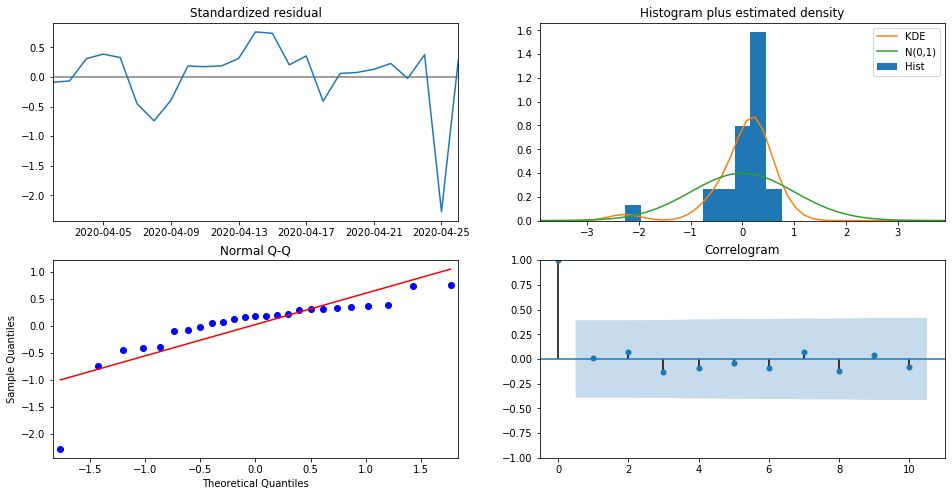

In [14]:
# Run model diagonstics
ts_results.plot_diagnostics(figsize=(16, 8))
plt.show()

The above result is not satifactory to forecast the vehicular traffic. In order to find out optimum parameters for p, q and d with seasonality factor as 168(24*7), the laptop runs out of computing power.
The model will perform better with optimized hyperparameters.

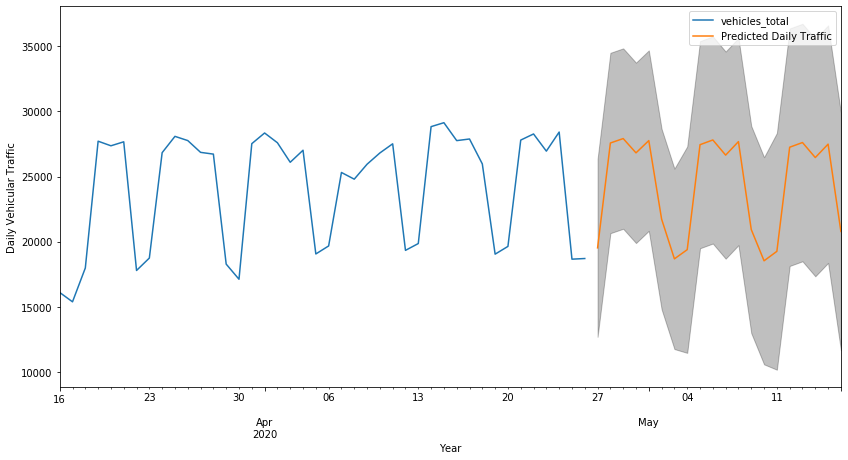

In [15]:
# Producing and visualizing forecasts

pred_uc = ts_results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = data_daily.plot(label='Observed Passengers', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Predicted Daily Traffic')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Daily Vehicular Traffic')
plt.legend()
plt.show()

In [18]:
# Save the model using joblib
import joblib

joblib.dump(ts_results, 'D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\time_series_model.pkl')


['D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\time_series_model.pkl']

In [19]:
# Load the model from the file 
model = joblib.load('D:\\Study\\DataScience\\Data\\MachineLearningData\\TrafficData\\time_series_model.pkl')

In [33]:
# Predict the results
import datetime

# Provide a single date as string 
# If you provide different dates as weekday and weekend, you can see clear difference in the vehicular traffic.
date_time_str = '2020-05-04 00:19:00'

# Convert the date in string format to Datetime format so that our Time Series model can accept the input.
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

# Predict the vehicular traffic on specified date and time
model.predict(date_time_obj)

2020-05-05    27450.261822
Freq: D, dtype: float64